# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import data -- Silakan di-import berdasarkan direktori masing-masing

In [2]:
house = pd.read_csv('train_house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Drop variabel NaN
Nan_Value = house.dropna()
Nan_Value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
# Memisahkan data menjadi numerikal & kategorikal
house_num = house.loc [0:1460, ["Id", "MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea", "BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]]
house_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

In [6]:
house['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object

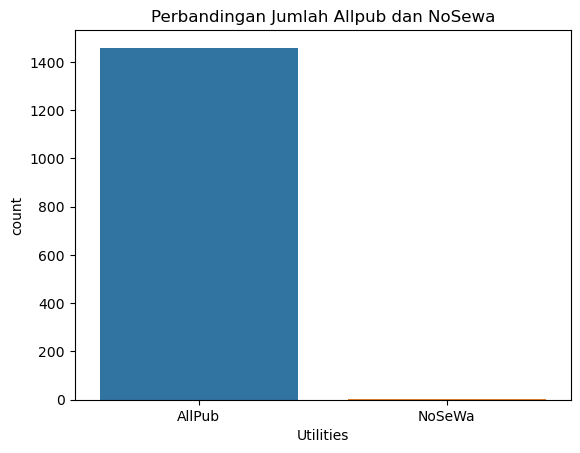

In [7]:
### Tulis kode Anda di sini
sns.barplot(x=house['Utilities'].value_counts().index,
              y=house['Utilities'].value_counts())
plt.title ("Perbandingan Jumlah Allpub dan NoSewa")
plt.xlabel ("Utilities")
plt.show()

In [8]:
house['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [9]:
house['HouseStyle']

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

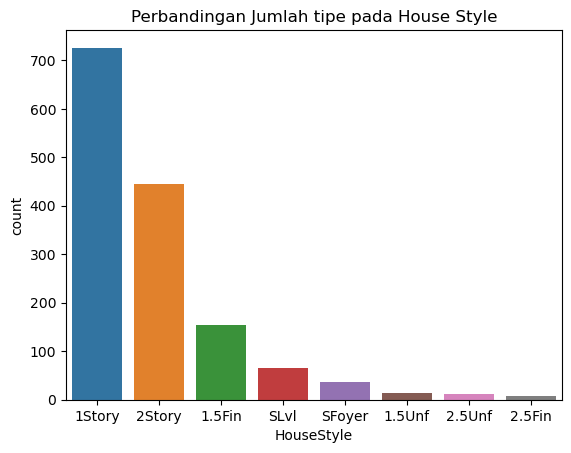

In [10]:
### Tulis kode Anda di sini
sns.barplot(x=house['HouseStyle'].value_counts().index,
              y=house['HouseStyle'].value_counts())
plt.title ("Perbandingan Jumlah tipe pada House Style")
plt.xlabel ("HouseStyle")
plt.show()

In [11]:
house['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

In [12]:
house['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

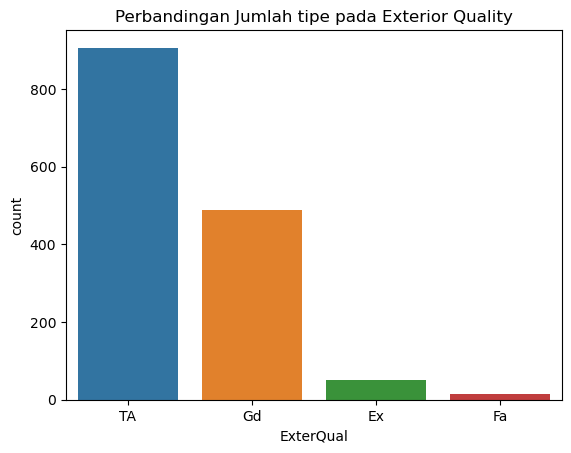

In [13]:
### Tulis kode Anda di sini
sns.barplot(x=house['ExterQual'].value_counts().index,
              y=house['ExterQual'].value_counts())
plt.title ("Perbandingan Jumlah tipe pada Exterior Quality")
plt.xlabel ("ExterQual")
plt.show()

In [14]:
house['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

#### **Analisis tentang variabel kategorikal**
* Properti AllPub "All public Utilities (E,G,W,& S)" adalah properti yang paling banyak tersedia fasilitas dengan total sebanyak 1459 properti.*
* One Story merupakan style properti yang paling banyak dengan ID sebanyak 726.*
* Properti dengan Kualitas material ekterior Averange/Typical (TA) merupakan properti yang paling banyak sebanyak 906.*

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [15]:
house['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\2282593533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.0
Meac: 180921.19589041095
Std.Dev: 79442.50288288663


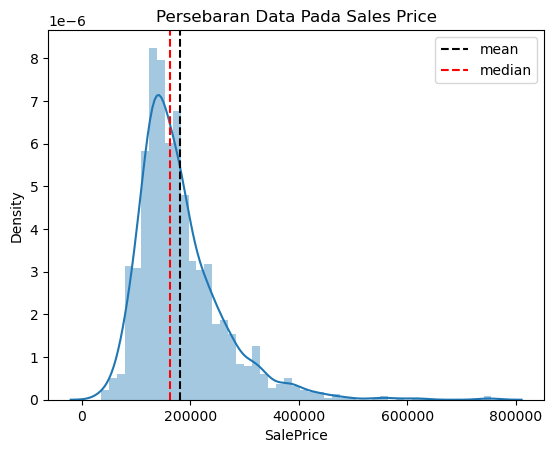

In [16]:
### Tulis kode Anda di sini
x = house_num['SalePrice']
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(x), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Sales Price")
plt.xlabel ("SalePrice")
print("Median:",x.median())
print("Meac:",x.mean())
print("Std.Dev:",x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**
* Distribusi Skewed to Right
* Data kebanyakan berada di range Rp.100.000,- sampai Rp.300.000,-
* *Nilai Tengah Sale Price berada di harga Rp. 163.000,-*
* *Rata-rata Sale Price adalah Rp. 180.921,-*
* *Standar deviasi Sale Price adalah 79415*

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [17]:
house['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\3846597507.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, axlabel=y.name)


Median: 1464.0
Meac: 1515.463698630137
Std.Dev: 525.4803834232027


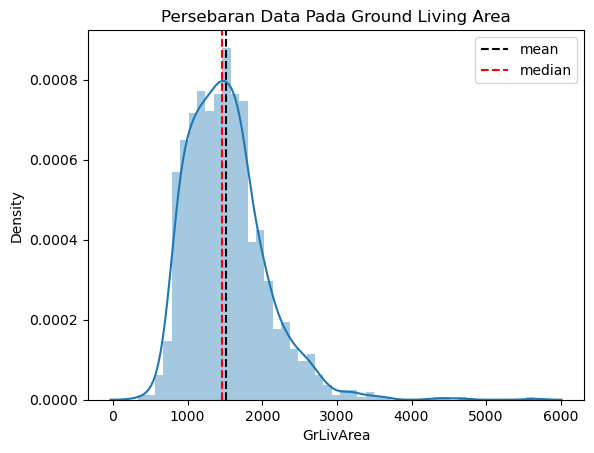

In [18]:
### Tulis kode Anda di sini
y = house_num['GrLivArea']
sns.distplot(y, axlabel=y.name)
line1 = plt.axvline(y.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(y), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Ground Living Area")
plt.xlabel ("GrLivArea")
print("Median:",y.median())
print("Meac:",y.mean())
print("Std.Dev:",y.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**
* Distribusi Skewed to Right
* Data kebanyakan berada di range 500 sampai 2500
* *Nilai Tengah GrLivArea adalah 1464 ft2*
* *Rata-rata GrLivArea adalah 1515,4 ft2*
* *Standar deviasi GrLivArea adalah 525,3 ft2*

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [19]:
house['GarageArea']

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\2792862777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z, axlabel=z.name)


Median: 480.0
Meac: 472.9801369863014
Std.Dev: 213.80484145338076


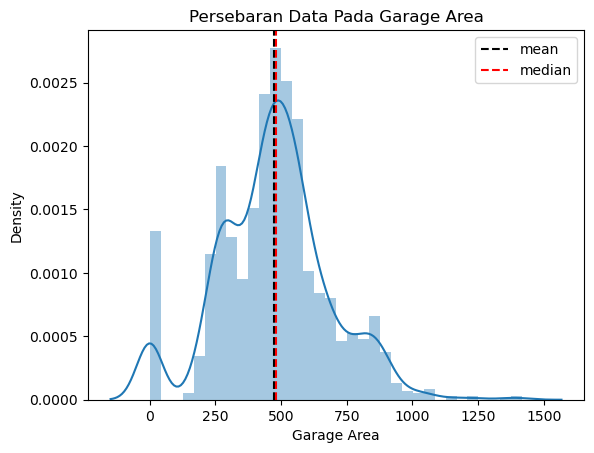

In [20]:
### Tulis kode Anda di sini
z = house_num['GarageArea']
sns.distplot(z, axlabel=z.name)
line1 = plt.axvline(z.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(z), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Garage Area")
plt.xlabel ("Garage Area")
print("Median:",z.median())
print("Meac:",z.mean())
print("Std.Dev:",z.std())
plt.show()

In [21]:
print("Number of nonzero values:",np.sum(house_num['GarageArea'] !=0))
print("Number of zero values:",np.sum(house_num['GarageArea'] ==0))

Number of nonzero values: 1379
Number of zero values: 81


#### **Analisis tentang variabel `GarageArea`**

* terdapat 81 nilai 0 pada data Garage Area
* *Nilai Tengah Luas garasi adalah 480 ft2*
* *Rata-rata Luas garasi adalah 472,9 ft2*
* *Standar deviasi Luas garasi adalah 213,7 ft2*

In [22]:
#Menghapus Nilai Nol Pada Garage Area
house_num = house_num[house_num['GarageArea'] > 0]
house_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


> terdapat 1379 data setelah dilakukan filltering terhadap 81 nilai Nol pada Garage Area.

Median: 484.0
Meac: 500.76214648295866
Std.Dev: 185.68051979433156


C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\1008685838.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z, axlabel=z.name)


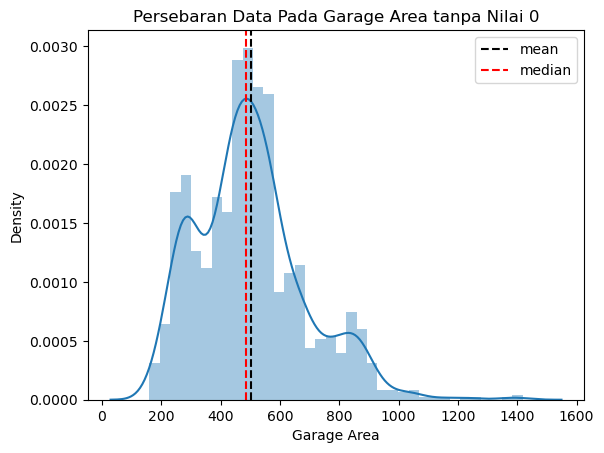

In [23]:
z = house_num['GarageArea']
sns.distplot(z, axlabel=z.name)
line1 = plt.axvline(z.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(z), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Garage Area tanpa Nilai 0")
plt.xlabel ("Garage Area")
print("Median:",z.median())
print("Meac:",z.mean())
print("Std.Dev:",z.std())
plt.show()

## Pemrosesan Data Variabel Numerikal

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
house_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\2450347287.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 5.224014811372864
Meac: 5.235554614806934
Std.Dev: 0.16510331799682165


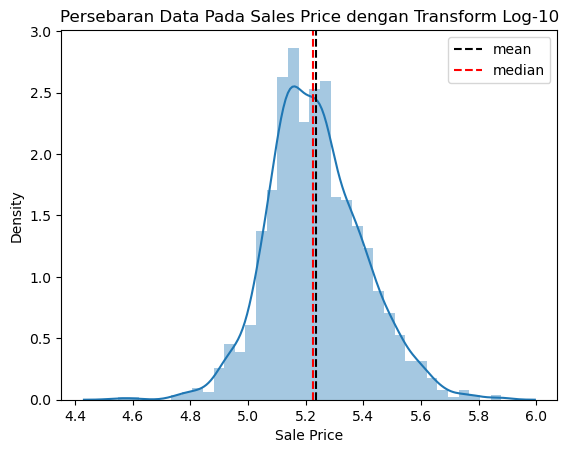

In [26]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
x = np.log10(house_num['SalePrice'])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(x), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Sales Price dengan Transform Log-10")
plt.xlabel ("Sale Price")
print("Median:",x.median())
print("Meac:",x.mean())
print("Std.Dev:",x.std())
plt.show()

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\1840730230.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, axlabel=y.name)


Median: 3.1699681739968923
Meac: 3.1632092720944964
Std.Dev: 0.1401904506619257


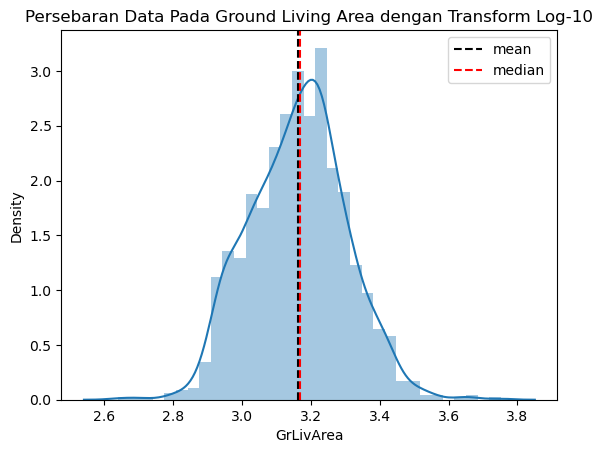

In [27]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
y = np.log10(house_num['GrLivArea'])
sns.distplot(y, axlabel=y.name)
line1 = plt.axvline(y.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(y), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Ground Living Area dengan Transform Log-10")
plt.xlabel ("GrLivArea")
print("Median:",y.median())
print("Meac:",y.mean())
print("Std.Dev:",y.std())
plt.show()

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\550342219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z, axlabel=z.name, bins=20)


Median: 484.0
Meac: 500.76214648295866
Std.Dev: 185.68051979433156


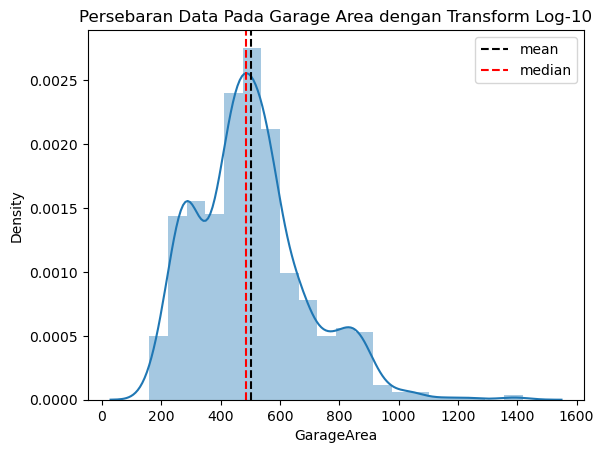

In [28]:
# Mengapus nilai nol pada Variabel Garage Area
z = house_num['GarageArea'][house_num['GarageArea'] !=0]
sns.distplot(z, axlabel=z.name, bins=20)
line1 = plt.axvline(z.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(z), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Garage Area dengan Transform Log-10")
plt.xlabel ("GarageArea")
print("Median:",z.median())
print("Meac:",z.mean())
print("Std.Dev:",z.std())
plt.show()

* Distribusi Skewed to Right
* Data kebanyakan berada di range 200 sampai 900

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_20064\3945522528.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z, axlabel=z.name, bins=20)


Median: 2.6848453616444123
Meac: 2.6696154158200915
Std.Dev: 0.16427840573730204


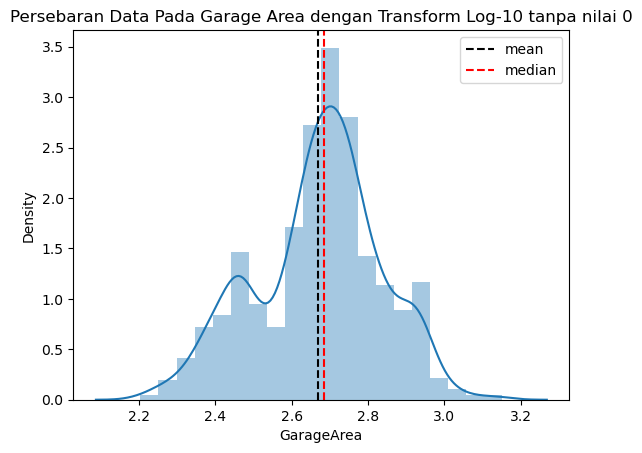

In [29]:
# Transformasi log-10 GarageArea

### Tulis kode Anda di sini
z = np.log10(house_num['GarageArea'][house_num['GarageArea'] !=0])
sns.distplot(z, axlabel=z.name, bins=20)
line1 = plt.axvline(z.mean(), color='k',linestyle='--', label="mean")
line2 = plt.axvline(np.median(z), color='r',linestyle='--', label="median")
first_legend= plt.legend(handles=[line1,line2], loc=1)
plt.title ("Persebaran Data Pada Garage Area dengan Transform Log-10 tanpa nilai 0")
plt.xlabel ("GarageArea")
print("Median:",z.median())
print("Meac:",z.mean())
print("Std.Dev:",z.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# 1. `GrLivArea` dengan `SalePrice`

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
house_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


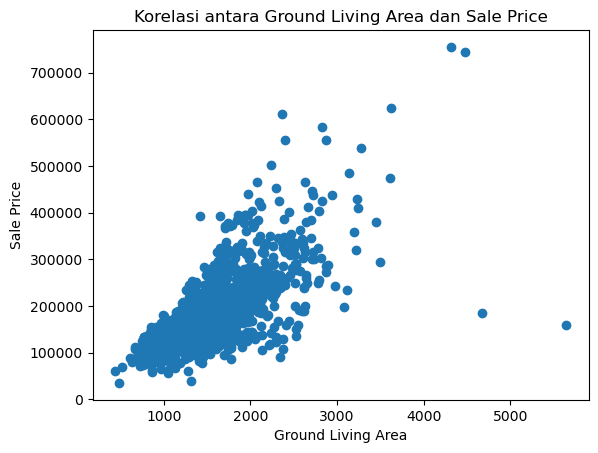

In [32]:
fig = plt.figure()
plt.scatter(house_num['GrLivArea'], house_num['SalePrice'])
plt.title ("Korelasi antara Ground Living Area dan Sale Price")
plt.xlabel ("Ground Living Area")
plt.ylabel ("Sale Price")
plt.show()

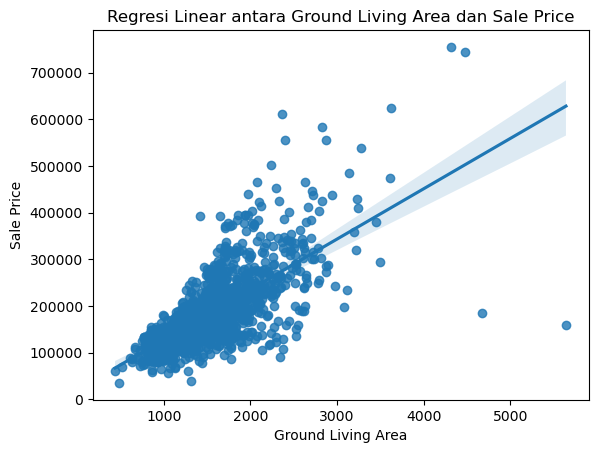

In [33]:
fig = plt.figure()
sns.regplot(data=house_num, x='GrLivArea', y='SalePrice')
plt.title ("Regresi Linear antara Ground Living Area dan Sale Price")
plt.xlabel ("Ground Living Area")
plt.ylabel ("Sale Price")
plt.show()

# 2. `GarageArea` dengan `SalePrice`

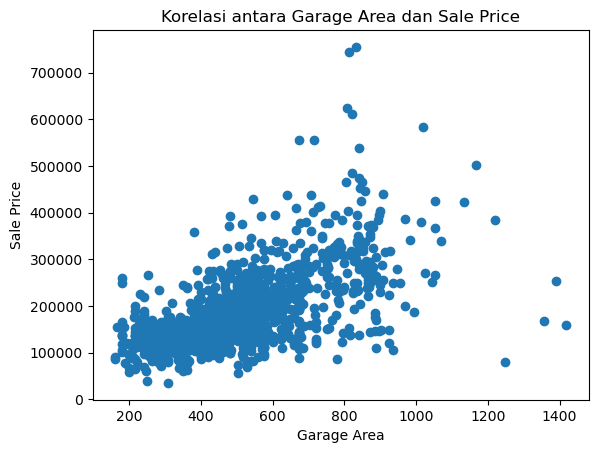

In [34]:
fig = plt.figure()
plt.scatter(house_num['GarageArea'], house_num['SalePrice'])
plt.title ("Korelasi antara Garage Area dan Sale Price")
plt.xlabel ("Garage Area")
plt.ylabel ("Sale Price")
plt.show()

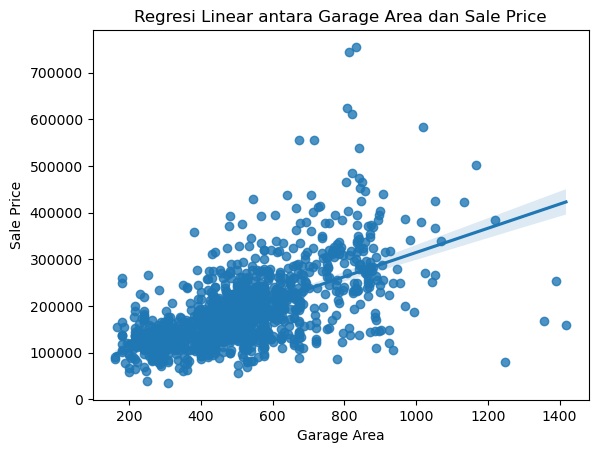

In [35]:
fig = plt.figure()
sns.regplot(data=house_num, x='GarageArea', y='SalePrice')
plt.title ("Regresi Linear antara Garage Area dan Sale Price")
plt.xlabel ("Garage Area")
plt.ylabel ("Sale Price")
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Luas area tinggal (GrLivArea) memiliki hubungan positif dengan Sale Price yang mana semakin luas area tinggal maka Sale Price properti yang dijual semakin tinggi.
* Begitu Juga dengan Luas Area Garasi (GarageArea) memiliki hubungan yang positif dengan Sale Price yang mana semakin luas area Garasi Sale Pricenya juga samakin tinggi.|